# Medical Insurance Cost prediction

This exercise is about performing some of the steps described in the notebook for the California Housing Data on another dataset for Medical Insurance Cost prediction.

# Get the Data

In [239]:
import pandas as pd

medical = pd.read_csv("https://bit.ly/44evDuW")

# Take a Quick Look at the Data Structure

In [240]:
# display the first 5 rows of the dataset by calling the head() function on medical
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Each row represents one patient. 
There are 7 attributes.

The `info()` method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number
of non-null values:

In [241]:
# get the number of rows, columns, and data types by using the info() method
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [242]:
# show the number of patients in each region by using the value_counts() method on the "region" column
medical['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Let’s look at the other fields. The describe() method shows a summary
of the numerical attributes.

In [243]:
# show descriptive statistics for the dataset by calling the describe() method on medical
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

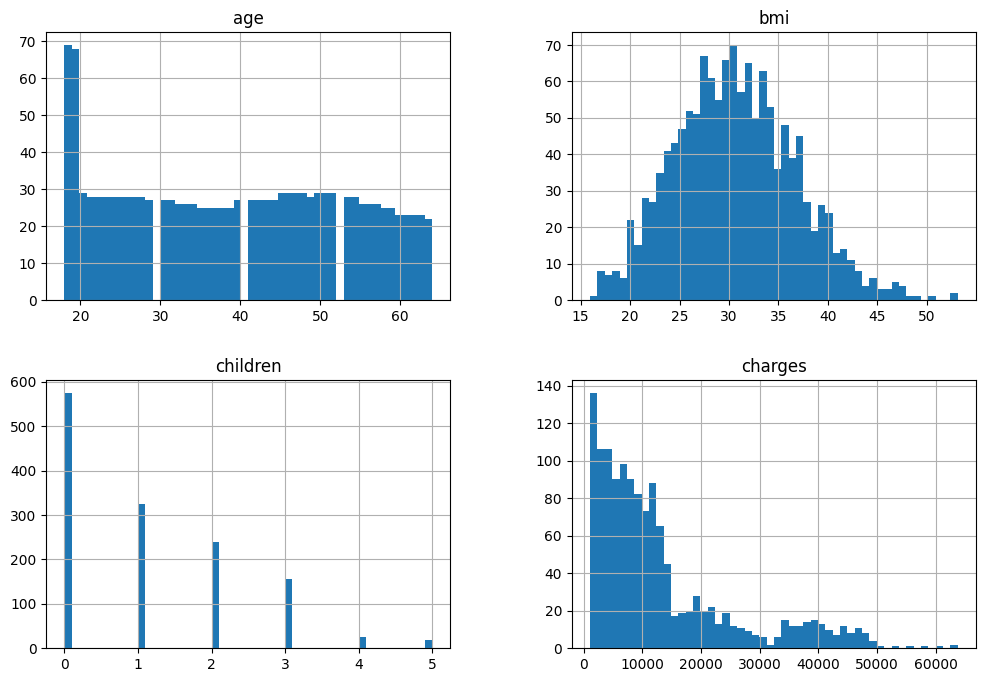

In [244]:
# show histograms for the numerical columns by using the hist() method on medical
medical.hist(bins=50, figsize=(12,8))

Briefly write here what you observe from these histograms.

No X and Y axis lables so I have no clue what these numbers represent. 

## Create a Test Set

In [245]:
# use train_test_split() to split the data into training and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(medical, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(1070, 268)

# Explore and Visualize the Data to Gain Insights

So far you have only taken a quick glance at the data to get a general
understanding of the kind of data you are manipulating. Now the goal is to
go into a little more depth.

First, make sure you have put the test set aside and you are only
exploring the training set.

In [246]:
# make a copy of the train set and save it to a variable called medical
medical = train_set.copy()

<Axes: >

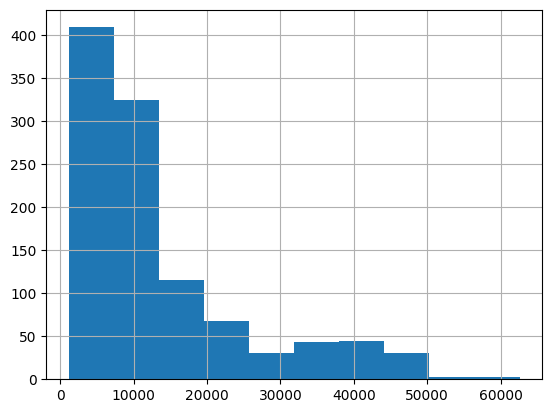

In [247]:
# build a histogram of the charges column
medical['charges'].hist()

This distribution is right-skewed. To make it closer to normal we can apply natural log

<Axes: >

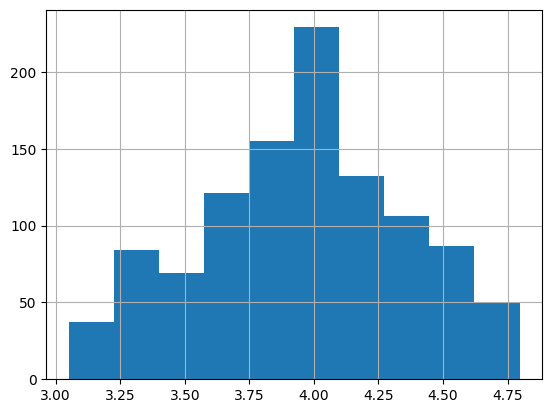

In [248]:
# apply a log transformation to the charges column using the np.log10() function
# build a histogram of the transformed column
import numpy as np

np.log10(medical['charges']).hist()



Now let's look at the mean charges by region

<Axes: xlabel='region'>

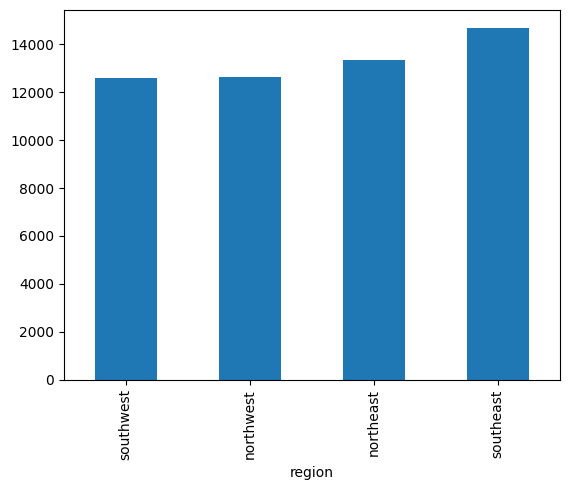

In [249]:
# compute the average insurance cost for each region
# sort the charges_by_region Series from the lowest to highest cost
# plot the sorted Series using the plot.bar() method
charges_by_region = medical.groupby('region')['charges'].mean().sort_values()
charges_by_region.plot.bar()

Overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region.

Now, create three grouped barcharts for average charges by region grouped by sex, smoking, and number of children. 

### How to create grouped barcharts?

Creating grouped bar charts with Seaborn is a bit more intuitive compared to Matplotlib. 
You can use the catplot function with kind='bar' to create grouped bar charts. Here is an example on the tips datasets that comes with Seaborn. 
The tips dataset contains information about the total bill and tip amount for different meals, along with additional information such as the sex of the individual paying for the meal, whether they are a smoker, the day and time of the meal, and the size of the party.

We will create a grouped bar chart showing the average total bill for each day, grouped by whether the meal took place at lunch or dinner. 



```
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Create a grouped bar chart
sns.catplot(data=tips, x="day", y="total_bill", hue="time", kind="bar")

plt.show()
```
In this plot, the height of the bars represents the average total bill for meals on each day, with separate bars for lunch and dinner. 

The `catplot` function is a flexible function that can create a variety of different plot types. By setting `kind='bar'`, we specify that we want a bar chart. The x and y arguments specify the data for the x and y axes, and the `hue` argument specifies a third variable that is used to group the data.

In the context of Seaborn and many other statistical visualization libraries, error bars commonly represent one standard deviation or standard error of the mean.

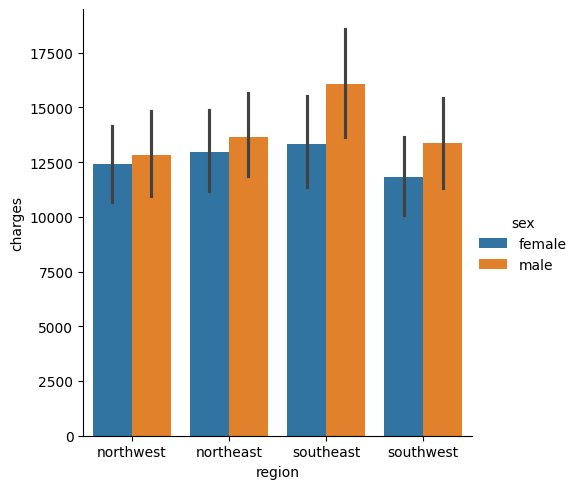

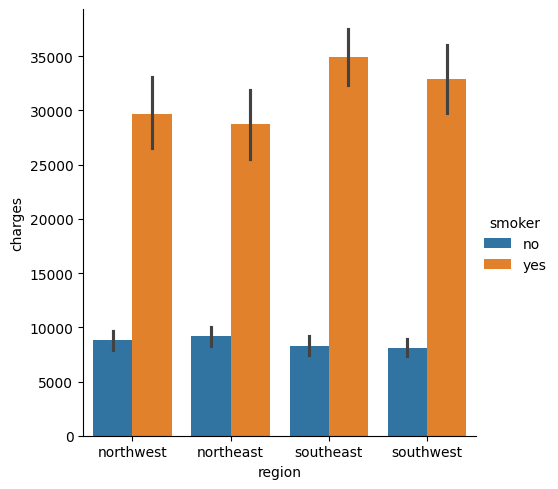

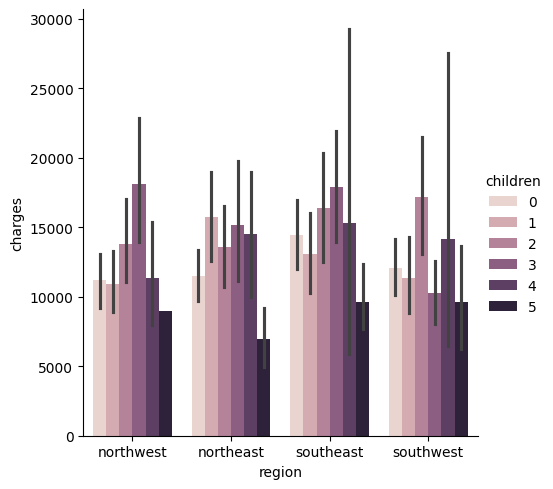

In [250]:
# plot grouped bar charts of region and insurance costs hue by sex, smoker, and number of children (three separate charts)
# use the catplot() function to create the bar charts
# set the kind parameter to "bar" and the data parameter to medical
import seaborn as sns
import matplotlib.pyplot as plt

#plot grouped bar charts of region and insurance costs hue by sex
sns.catplot(data=medical, x='region', y='charges', hue = 'sex', kind='bar')
sns.catplot(data=medical, x='region', y='charges', hue = 'smoker', kind='bar')
sns.catplot(data=medical, x='region', y='charges', hue = 'children', kind='bar')
plt.show()

**What do you observe?** Briefly write what you observe from the charts. 
<br>Over all 4 regions males pay more than females, smokers pay more than non-smokers, and family with 2 and or 3 children pay more than family with no children and 4 or more children.

Now let's analyze the medical charges by age, bmi and children according to the smoking factor.

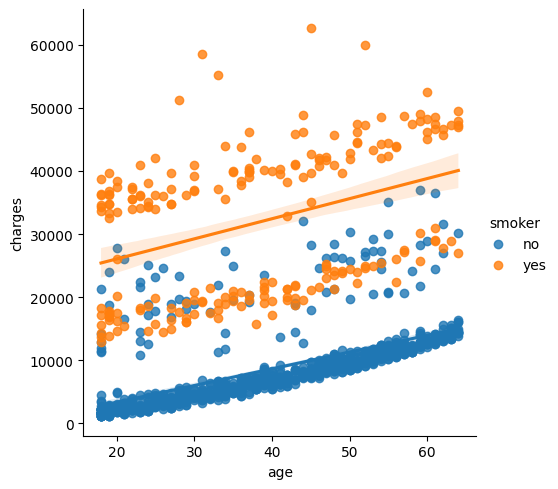

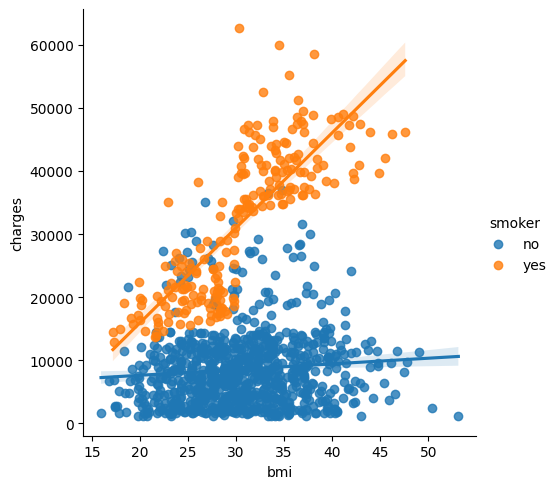

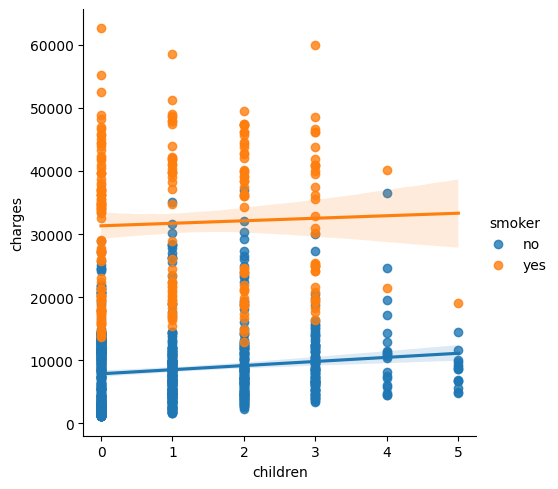

In [251]:
# using the lmplot() function of seaborn, build a scatter plot of age and insurance costs, hue by smoker
# build a second scatter plot of bmi and insurance costs, hue by smoker
# build a third scatter plot of children and insurance costs, hue by smoker
sns.lmplot(data=medical, x='age', y='charges', hue='smoker', scatter=True)
sns.lmplot(data=medical, x='bmi', y='charges', hue='smoker', scatter=True)
sns.lmplot(data=medical, x='children', y='charges', hue='smoker', scatter=True)
plt.show()

Describe in a one-liner what you obeserve from the charts.

### Look for Correlations

In [252]:
# compute pairwise correlation of columns using the corr() method
medical_num = medical.select_dtypes(include=[np.number])
corr_matrix = medical_num.corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.118274,0.060999,0.281721
bmi,0.118274,1.000000,-0.005040,0.197316
children,0.060999,-0.005040,1.000000,0.071885
charges,0.281721,0.197316,0.071885,1.000000


The correlation coefficient ranges from –1 to 1. When it is close to 1, it
means that there is a strong positive correlation. 
Finally, coefficients close to 0 mean that there is no linear correlation.

Another way to check for correlation between attributes is to use the
Pandas `scatter_matrix()` function, which plots every numerical
attribute against every other numerical attribute.

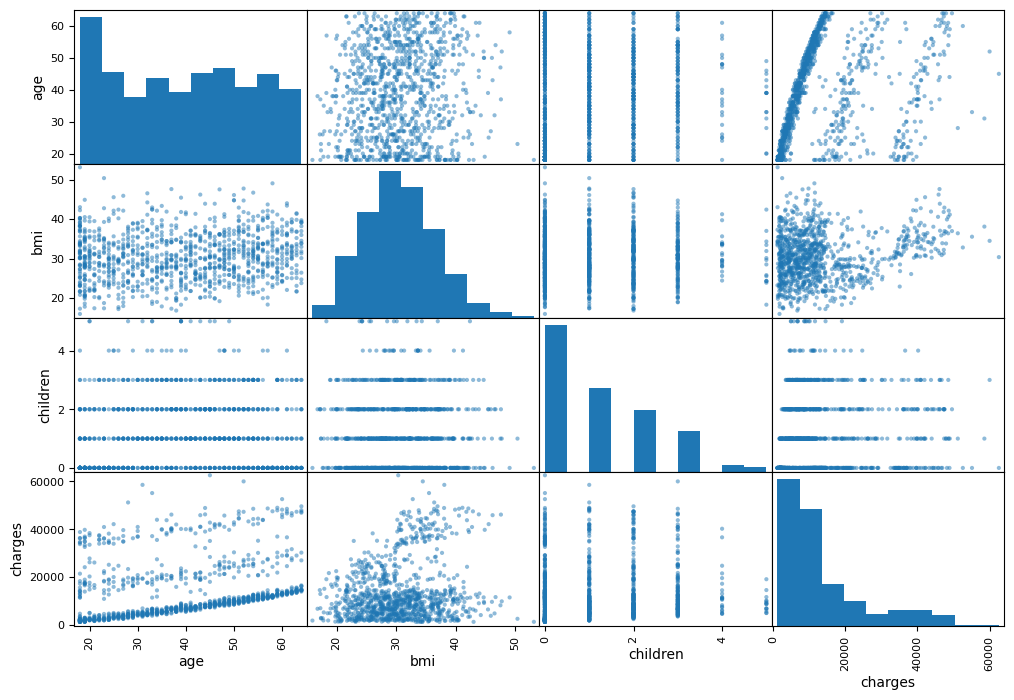

In [253]:
# plot correlation matrix using scatter_matrix() function from pandas.plotting
from pandas.plotting import scatter_matrix

attributes = ['age', 
              'bmi', 
              'children', 
              'charges']

scatter_matrix(medical[attributes], figsize=(12, 8))
plt.show()

The main diagonal would be full of straight lines if Pandas plotted each
variable against itself, which would not be very useful. So instead, the
Pandas displays a histogram of each attribute.

Looking at the correlation scatterplots, it seems like the most promising
attribute to predict the charge value is bmi, so let's
zoom in on their scatterplot.

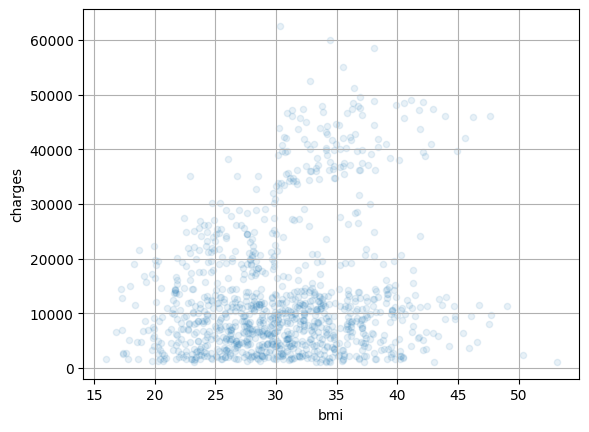

In [254]:
# plot a scatter plot of bmi vs. insurance costs using the medical.plot() method, use the alpha parameter to set the opacity of the points to 0.1
medical.plot(kind="scatter", 
             x="bmi",
             y="charges",
             alpha=0.1, grid=True)
plt.show()

The correlation is somewhat visible; you can clearly see the upward trend.

# Prepare the data for ML

In [269]:
# drop the charges column from the train_set and save the resulting dataset to a variable called `medical`
# create a copy of the train_set labels and save it to a variable called `medical_labels`
# replace None with the correct code

medical = train_set.drop("charges", axis=1)
medical_labels = train_set["charges"].copy()

# Transformation Pipelines

As you can see, there are many data transformation steps that need to be
executed in the right order. Fortunately, Scikit-Learn provides the
Pipeline class to help with such sequences of transformations.

In [270]:
# uncomment the following code to create a pipeline for preprocessing the data

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_attribs = ["age", "bmi", "children"]
cat_attribs = ["sex", "smoker", "region"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

medical_prepared = preprocessing.fit_transform(medical)

print(medical_prepared.shape)
print(preprocessing.get_feature_names_out())

(1070, 11)
['num__age' 'num__bmi' 'num__children' 'cat__sex_female' 'cat__sex_male'
 'cat__smoker_no' 'cat__smoker_yes' 'cat__region_northeast'
 'cat__region_northwest' 'cat__region_southeast' 'cat__region_southwest']


# Select and Train a Model

At last! You framed the problem, you got the data and explored it, you
sampled a training set and a test set, and you wrote a preprocessing
pipeline to automatically clean up and prepare your data for machine
learning algorithms. You are now ready to select and train a machine
learning model.

## Train and Evaluate on the Training Set

The good news is that thanks to all these previous steps, things are now
going to be easy! You decide to train a very basic linear regression model
to get started:

In [271]:
# create a pipeline for preprocessing the data and fitting a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
# lin_reg = ...

# housing_labels is the column we want to predict
# uncomment the following line to fit the model

lin_reg.fit(medical, medical_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

Try out the model on the training set, look at the first five predictions and compare them to
the labels:

In [272]:
# uncomment the following line to make predictions

medical_predictions = lin_reg.predict(medical)
medical_predictions

array([ 7094.54007011,  8344.72998713,  9153.77419778, ...,
       11441.08519155, 37314.37460682, 11453.12102783])

In [273]:
# uncomment the following lines to compute the RMSE

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(medical_labels, medical_predictions, squared=False)
lin_rmse

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6105.545160099847

Now try `DecisionTreeRegressor`, as this is a fairly powerful
model capable of finding complex nonlinear relationships in the data
(decision trees are covered later in the course):

In [277]:
# use DecisionTreeRegressor to train the model
# use the make_pipeline() function to create a pipeline for preprocessing and model training
# use the preprocessing object you created earlier
# make predictions on the training set and compute the RMSE
from sklearn.tree import DecisionTreeRegressor

preprocess_pipeline = ColumnTransformer(
    [('num', num_pipeline, num_attribs), 
     ('cat', cat_pipeline, cat_attribs)])

tree_reg = make_pipeline(preprocess_pipeline, DecisionTreeRegressor())
tree_reg.fit(medical, medical_labels)

medical_predictions = tree_reg.predict(medical)
tree_rmse = mean_squared_error(medical_labels, medical_predictions, squared=False)
tree_rmse

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


494.20598375812835

# Better Evaluation Using Cross-Validation

The following code randomly splits the training set into 10 nonoverlapping
subsets called folds, then it trains and evaluates the decision tree model
10 times, picking a different fold for evaluation every time and using the
other 9 folds for training. The result is an array containing the 10
evaluation scores:

In [279]:
# uncomment the following lines to train the model and make predictions

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, 
                              medical,medical_labels,
                              scoring="neg_root_mean_squared_error", 
                              cv=10)
tree_rmses

array([5811.09910239, 6478.75358974, 6453.89344456, 6739.63386729,
       6940.63175564, 6270.54994723, 7450.89751372, 7611.63790781,
       6603.02288416, 5795.34493809])

**Warning**. Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the RMSE. It’s a negative value, so you need to switch the sign of the output to get the RMSE scores.

In [280]:
# uncomment the following line to compute the mean of the RMSEs

np.mean(tree_rmses)

6615.546495062836

Let’s try one last model now: the RandomForestRegressor. As you will
see later in the course, random forests work by training many decision trees on
random subsets of the features, then averaging out their predictions.

In [282]:
# use RandomForestRegressor to train the model
# use the make_pipeline() function to create a pipeline for preprocessing and model training
# use the preprocessing object you created earlier
# make predictions on the training set and compute the RMSEs using cross-validation
# compute the mean of the RMSEs

from sklearn.ensemble import RandomForestRegressor

tree_reg = make_pipeline(preprocess_pipeline, RandomForestRegressor())
tree_reg.fit(medical, medical_labels)

medical_predictions = tree_reg.predict(medical)
tree_rmse = mean_squared_error(medical_labels, medical_predictions, squared=False)
tree_rmse


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1849.18099300479

# Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now
need to fine-tune them.


## Randomized Search for Good Hyperparameters


In [283]:
# uncomment the following lines to search for the best hyperparameters

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),
                          ])

param_distribs = {'random_forest__max_features': randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, 
                                param_distributions=param_distribs,
                                n_iter=10, 
                                cv=3,
                                scoring='neg_root_mean_squared_error', 
                                random_state=42)

rnd_search.fit(medical, medical_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'region'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12c133530>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [284]:
# uncomment the following lines to print the best search scores

rn_res = pd.DataFrame(rnd_search.cv_results_)
rn_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rn_res.head(5)["mean_test_score"]

7   -4810.698561
9   -4861.373750
0   -4912.976290
4   -4912.976290
3   -4976.129581
Name: mean_test_score, dtype: float64

In [285]:
# uncomment the following lines to print the feature importances

final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances

array([0.14032922, 0.18831699, 0.0230048 , 0.00493845, 0.00454404,
       0.28737838, 0.33010198, 0.00580561, 0.00521445, 0.00654471,
       0.00382136])

In [286]:
# uncomment the following line to print the feature importances with the feature names

sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.3301019845385152, 'cat__smoker_yes'),
 (0.2873783836848969, 'cat__smoker_no'),
 (0.18831699212058217, 'num__bmi'),
 (0.1403292169242826, 'num__age'),
 (0.023004795671815754, 'num__children'),
 (0.006544713122635331, 'cat__region_southeast'),
 (0.005805609883995695, 'cat__region_northeast'),
 (0.0052144512790023795, 'cat__region_northwest'),
 (0.0049384524581677835, 'cat__sex_female'),
 (0.004544038586538502, 'cat__sex_male'),
 (0.0038213617295676603, 'cat__region_southwest')]

In [287]:
# now that you have a final model, evaluate it on the test set (find rmse)
np.mean(tree_rmses)

6615.546495062836